In [1]:
import psycopg2

In [2]:
import pandas as pd
import sklearn as sk
import matplotlib

In [3]:
!pip install --user sklearn
!pip install --user  pandas
!pip install --user matplotlib
!pip install --user pandas

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Carregando bibliotecas

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [5]:
conn  =  psycopg2.connect(host='localhost', database= 'postgres',user = 'postgres',password = 'senha')

# test

In [7]:
df = pd.read_sql_query("""select latitude,longitude from dim_local
""",conn)
df.dtypes

latitude     float64
longitude    float64
dtype: object

In [8]:
xrm2 = df.loc[:,["latitude","longitude"]].values
xrm2

array([[         nan,          nan],
       [-23.69281488, -46.71313183],
       [-23.70306419, -46.68790624],
       ..., 
       [-23.70051295, -46.64661748],
       [-23.64232857, -46.73899924],
       [-23.65240115, -46.70581291]])

In [50]:
#df.groupby(by='latitude').count()

Text(0,0.5,'rubrica')

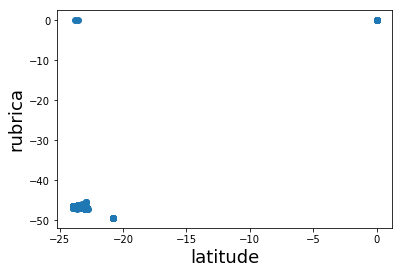

In [9]:
xrm2 = df.loc[:,["latitude","longitude"]].values
plt.scatter(xrm2[:,0], xrm2[:,1], cmap='gist_rainbow')
plt.xlabel('latitude', fontsize=18)
plt.ylabel('rubrica', fontsize=18)

# Outra analise

In [10]:
df = pd.read_sql_query("""select local,rubrica,data,hora from fato_crime limit 1000""",conn)

In [11]:
df.head()

,local,rubrica,data,hora
0,10312,2,183,739
1,612320,6,179,1112
2,25,5,474,632
3,5,5,473,722
4,603071,5,501,1142


In [12]:
df = df/df.max()


In [13]:
xrm = df.loc[:,["rubrica","hora"]].values

Text(0,0.5,'hora')

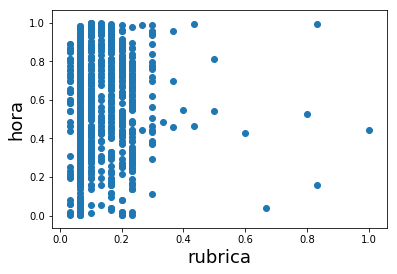

In [14]:
plt.scatter(xrm[:,0], xrm[:,1], cmap='gist_rainbow')
plt.xlabel('rubrica', fontsize=18)
plt.ylabel('hora', fontsize=18)

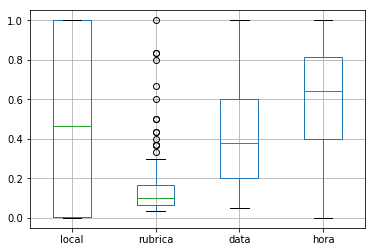

In [15]:
df.boxplot()

In [16]:
#!pip install --user yellowbrick
from yellowbrick.cluster import KElbowVisualizer

In [17]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20),timings=False)

In [18]:
elbow = df[['local','rubrica']]
elbow.head()

,local,rubrica
0,0.016830,0.066667
1,0.999378,0.200000
2,0.000041,0.166667
3,0.000008,0.166667
4,0.984283,0.166667


In [19]:
visualizer.fit(elbow) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

TypeError: flip() missing 1 required positional argument: 'axis'

In [16]:
visualizer.elbow_value_

4

# Criando Agrupamento

In [17]:
km = KMeans(n_clusters = visualizer.elbow_value_)
km.fit(xrm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Comparando os resultados

In [18]:
new_labels = km.labels_
new_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
res = pd.DataFrame(new_labels)
res.columns = ['labels']
res['qtd'] = 1
res.groupby(by='labels').count()

,qtd
labels,
0,91
1,112
2,111
3,4


Text(0.5, 1.0, 'Com agrupamento')

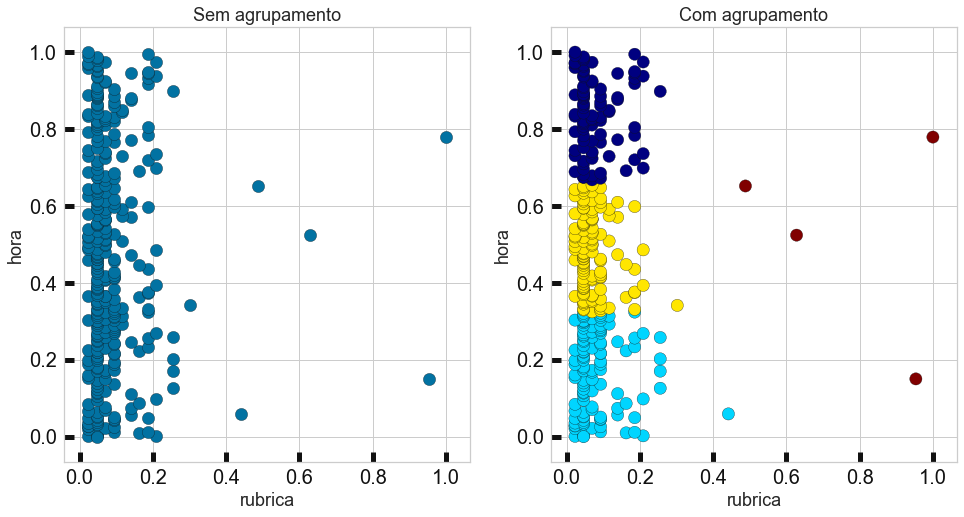

In [20]:
#7. Now, let’s compare our original data versus our clustered results using the following code.
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(xrm[:, 0], xrm[:, 1], cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(xrm[:, 0], xrm[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('rubrica', fontsize=18)
axes[0].set_ylabel('hora', fontsize=18)
axes[1].set_xlabel('rubrica', fontsize=18)
axes[1].set_ylabel('hora', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Sem agrupamento', fontsize=18)
axes[1].set_title('Com agrupamento', fontsize=18)

In [21]:
xrm = df.loc[:,["local","hora"]].values

Text(0, 0.5, 'hora')

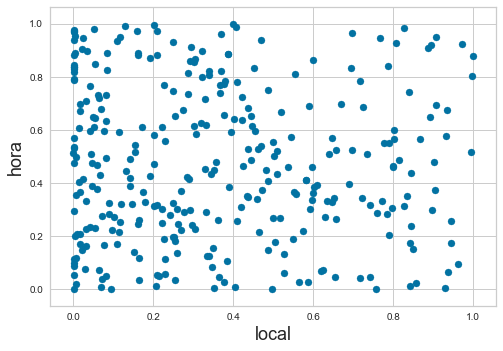

In [22]:
plt.scatter(xrm[:,0], xrm[:,1], cmap='gist_rainbow')
plt.xlabel('local', fontsize=18)
plt.ylabel('hora', fontsize=18)

In [23]:
km = KMeans(n_clusters = 5)
km.fit(xrm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
new_labels = km.labels_
new_labels

array([1, 1, 4, 1, 4, 1, 1, 1, 4, 1, 4, 4, 1, 4, 1, 1, 1, 4, 4, 1, 4, 1,
       1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 4, 1, 1, 1, 4, 1, 1,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 4, 4,
       4, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 4, 4, 1, 4, 4, 1, 1,
       1, 1, 1, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 1, 1,
       4, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 0,
       1, 3, 4, 3, 4, 0, 4, 0, 3, 1, 1, 1, 1, 3, 0, 3, 0, 1, 1, 2, 3, 0,
       0, 2, 2, 2, 0, 3, 0, 0, 3, 3, 2, 2, 3, 2, 0, 0, 3, 3, 0, 0, 0, 2,
       3, 0, 3, 3, 2, 3, 2, 2, 3, 0, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2,
       0, 2, 3, 3, 3, 3, 2, 3, 0, 2, 3, 0, 3, 0, 2, 0, 2, 3, 2, 3, 2, 2,
       3, 3, 0, 3, 3, 2, 3, 2, 3, 3, 3, 0, 2, 2, 3, 0, 3, 3, 3, 2, 3, 3,
       2, 2, 0, 3, 2, 2, 0, 2, 2, 3, 3, 3, 3, 2, 0, 2, 2, 2, 3, 3, 2, 2,
       2, 3, 2, 2, 0, 3, 0, 0, 0, 2, 2, 2, 3, 0, 2,

In [25]:
res = pd.DataFrame(new_labels)
res.columns = ['labels']
res['qtd'] = 1
res.groupby(by='labels').count()

,qtd
labels,
0,36
1,100
2,58
3,60
4,64


Text(0.5, 1.0, 'Com agrupamento')

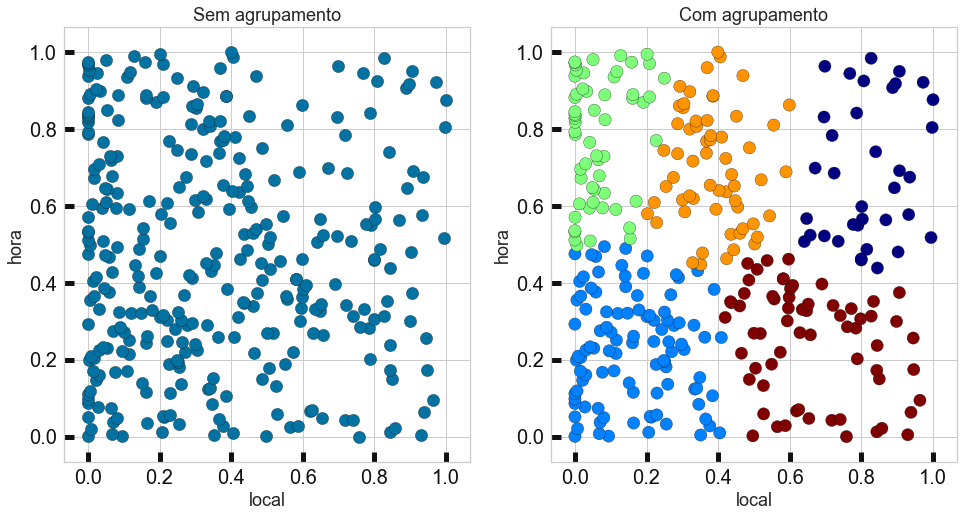

In [26]:
#7. Now, let’s compare our original data versus our clustered results using the following code.
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(xrm[:, 0], xrm[:, 1], cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(xrm[:, 0], xrm[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('local', fontsize=18)
axes[0].set_ylabel('hora', fontsize=18)
axes[1].set_xlabel('local', fontsize=18)
axes[1].set_ylabel('hora', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Sem agrupamento', fontsize=18)
axes[1].set_title('Com agrupamento', fontsize=18)

In [27]:
xrm = df.loc[:,["local","data"]].values

Text(0, 0.5, 'data')

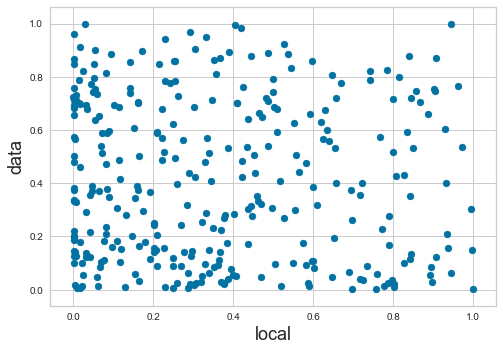

In [28]:
plt.scatter(xrm[:,0], xrm[:,1], cmap='gist_rainbow')
plt.xlabel('local', fontsize=18)
plt.ylabel('data', fontsize=18)

In [29]:
km = KMeans(n_clusters = 5)
km.fit(xrm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
new_labels = km.labels_
new_labels

array([1, 4, 3, 3, 0, 4, 0, 1, 2, 4, 0, 0, 3, 2, 4, 1, 4, 2, 0, 3, 0, 4,
       4, 1, 4, 4, 3, 2, 0, 0, 4, 4, 4, 4, 0, 1, 3, 1, 4, 4, 1, 4, 3, 0,
       3, 4, 1, 0, 0, 3, 1, 1, 1, 1, 2, 2, 3, 4, 3, 3, 4, 4, 1, 2, 1, 1,
       4, 0, 2, 3, 1, 1, 4, 4, 1, 2, 3, 4, 4, 4, 1, 0, 0, 3, 1, 0, 3, 0,
       0, 4, 4, 4, 0, 4, 2, 3, 4, 4, 4, 2, 0, 4, 3, 2, 0, 1, 2, 0, 1, 1,
       1, 3, 1, 2, 1, 0, 1, 2, 2, 3, 2, 2, 3, 0, 0, 4, 0, 2, 0, 1, 1, 3,
       0, 0, 4, 4, 2, 1, 4, 2, 2, 4, 0, 0, 2, 3, 4, 4, 3, 1, 1, 3, 0, 0,
       1, 4, 0, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 4, 0, 0, 0, 4, 4, 1, 0, 0,
       2, 4, 4, 1, 2, 0, 2, 2, 0, 3, 1, 1, 3, 1, 2, 2, 0, 3, 0, 2, 0, 4,
       0, 2, 1, 3, 4, 3, 1, 1, 3, 2, 4, 4, 4, 4, 3, 3, 3, 3, 1, 3, 3, 4,
       2, 4, 4, 3, 3, 3, 4, 4, 2, 1, 3, 2, 2, 2, 4, 0, 4, 3, 1, 0, 1, 1,
       3, 3, 0, 3, 0, 1, 4, 4, 3, 0, 3, 2, 1, 4, 3, 2, 3, 3, 3, 4, 4, 3,
       4, 4, 2, 0, 1, 4, 2, 4, 4, 4, 3, 2, 3, 1, 2, 1, 4, 1, 0, 3, 1, 4,
       1, 3, 4, 1, 0, 3, 2, 0, 2, 3, 1, 1, 3, 0, 1,

Text(0.5, 1.0, 'Com agrupamento')

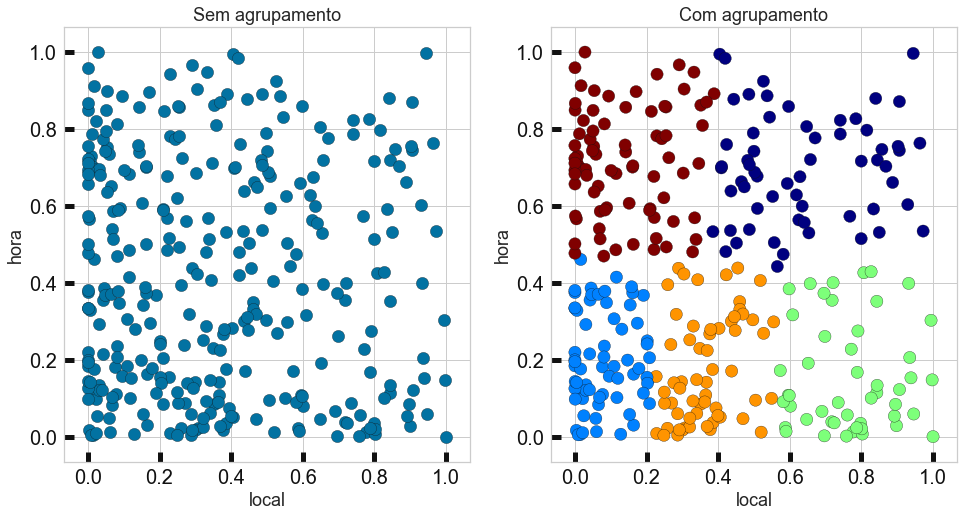

In [31]:
#7. Now, let’s compare our original data versus our clustered results using the following code.
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(xrm[:, 0], xrm[:, 1], cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(xrm[:, 0], xrm[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('local', fontsize=18)
axes[0].set_ylabel('hora', fontsize=18)
axes[1].set_xlabel('local', fontsize=18)
axes[1].set_ylabel('hora', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Sem agrupamento', fontsize=18)
axes[1].set_title('Com agrupamento', fontsize=18)